In [12]:
from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/final year/btc_tx_anomaly_detection/data/cleaned_undersampled_data.csv', index_col=False)

In [3]:
y = df['is_fraud']
X = df.drop('is_fraud', axis=1)

In [31]:
y.value_counts()

0.0    11217
1.0      108
Name: is_fraud, dtype: int64

In [4]:
labels = DBSCAN(0.6, min_samples=10).fit_predict(X)

In [5]:
binary_labels = np.where(labels == -1, 1, 0)

In [6]:
binary_labels

array([0, 0, 0, ..., 0, 0, 0])

In [8]:
X[binary_labels==1]

,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,vin_sz,vout_sz,size,fee,time,sat_per_byte
2327,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000361,0.001209,0.000515,0.720297,0.005686
3167,0.020664,0.020662,0.020663,0.020664,0.020662,0.000000,0.000361,0.001532,0.103093,0.769004,1.000000
10012,0.019723,0.019712,0.019717,0.000065,0.039423,0.569549,0.000000,0.569822,0.577320,0.409218,0.026278
10028,0.518740,0.518727,0.518734,0.001085,0.518727,0.896617,0.000361,0.597229,0.628866,0.451976,0.027313
10548,0.004793,0.004772,0.004783,0.000009,0.004772,1.000000,0.000361,1.000000,1.000000,0.597284,0.025959


In [9]:
y[binary_labels==1]

2327     0.0
3167     0.0
10012    0.0
10028    1.0
10548    0.0
Name: is_fraud, dtype: float64

In [10]:
# Plot ROC curve
def plot_roc(y_pred, fpr, tpr):

  roc_auc = auc(fpr, tpr)

  plt.figure(figsize=(4, 4))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')


  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()

## Confusion Matrix

In [11]:
def display_cm(y_true, predictions):

  cm = confusion_matrix(y_true, predictions)

  # Plot the confusion matrix as a heatmap
  plt.figure(figsize=(8, 6))

  group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
  group_percentages = ['{:.2%}'.format(value) for value in (cm / cm.sum(axis=1)[:, np.newaxis]).flatten()]
  labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)
  tick_labels = ['Non-Fraud', 'Fraud']
  sns.heatmap(cm, annot=labels, fmt='s', xticklabels=tick_labels, yticklabels=tick_labels)

  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  # Print classification report for additional metrics
  print("Classification Report:")
  print(classification_report(y_true, predictions))


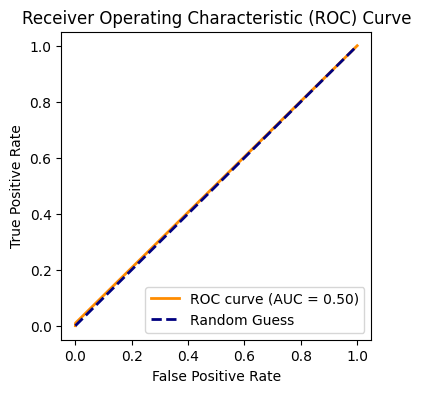

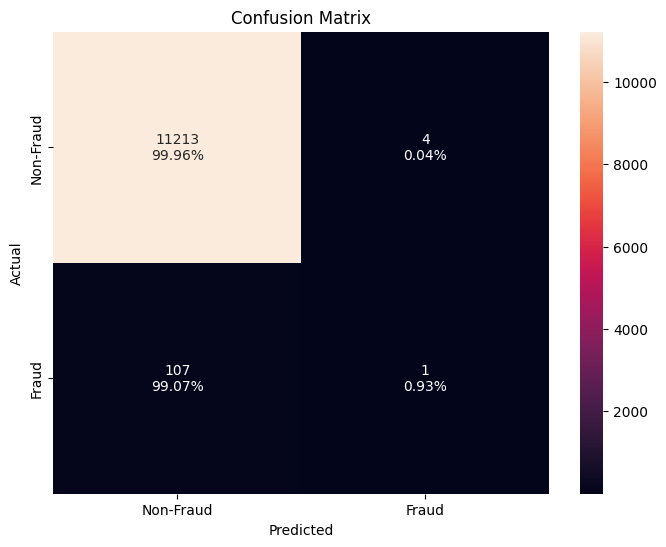

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     11217
         1.0       0.20      0.01      0.02       108

    accuracy                           0.99     11325
   macro avg       0.60      0.50      0.51     11325
weighted avg       0.98      0.99      0.99     11325



In [13]:
# plot the roc curve
fpr, tpr, thresholds = roc_curve(y, binary_labels, pos_label=1)
plot_roc(binary_labels, fpr, tpr)
# take a deeper look and see how the model predicted the samples
display_cm(y, binary_labels)